In [4227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
sns.set_style("darkgrid")
import re
from IPython.core.display import HTML
HTML("<style>.container { font-size: 14px; font-family: Fira Code, Arial, sans-serif; color: #ffffff; } </style>")

In [4228]:
data_income = pd.read_csv('data/income.csv')

In [4229]:
data = data_income.copy(deep=True)

In [4230]:
data.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,None,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [4231]:
data.drop(columns=['LANGUAGE', 'ETHNIC.CLASS', 'HOUSEHOLDER', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOME.TYPE', 'AREA'], inplace=True)

In [4232]:
data.index

RangeIndex(start=0, stop=8993, step=1)

In [4233]:
data.columns

Index(['INCOME', 'SEX', 'MARITAL.STATUS', 'AGE', 'EDUCATION', 'OCCUPATION',
       'DUAL.INCOMES'],
      dtype='object')

In [4234]:
data.size

62951

In [4235]:
data.shape

(8993, 7)

In [4236]:
data.memory_usage

<bound method DataFrame.memory_usage of                INCOME SEX MARITAL.STATUS    AGE                EDUCATION  \
0            [75.000-   F        Married  45-54  1 to 3 years of college   
1            [75.000-   M        Married  45-54         College graduate   
2            [75.000-   F        Married  25-34         College graduate   
3            -10.000)   F         Single  14-17           Grades 9 to 11   
4            -10.000)   F         Single  14-17           Grades 9 to 11   
...               ...  ..            ...    ...                      ...   
8988         -10.000)   F         Single  14-17          Grade 8 or less   
8989  [10.000-15.000)   M         Single  18-24  1 to 3 years of college   
8990         -10.000)   F         Single  14-17           Grades 9 to 11   
8991  [20.000-25.000)   M        Married  55-64  1 to 3 years of college   
8992  [30.000-40.000)   M         Single  25-34  1 to 3 years of college   

                         OCCUPATION DUAL.INCOME

In [4237]:
data.describe()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
count,8993,8993,8833,8993,8907,8857,8993
unique,9,2,5,7,6,9,3
top,-10.000),F,Single,25-34,1 to 3 years of college,Professional/Managerial,Not Married
freq,1745,4918,3654,2249,3066,2820,5438


In [4238]:
data.dtypes

INCOME            object
SEX               object
MARITAL.STATUS    object
AGE               object
EDUCATION         object
OCCUPATION        object
DUAL.INCOMES      object
dtype: object

In [4239]:
data.isnull().sum()

INCOME              0
SEX                 0
MARITAL.STATUS    160
AGE                 0
EDUCATION          86
OCCUPATION        136
DUAL.INCOMES        0
dtype: int64

In [4240]:
missing = data[data.isnull().any(axis=1)]
missing

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
14,[20.000-25.000),M,Widowed,55-64,Graduated High Scool,NaN,Not Married
80,[30.000-40.000),F,NaN,35-44,College graduate,Homemaker,No
100,[20.000-25.000),F,NaN,35-44,1 to 3 years of college,Professional/Managerial,Not Married
114,[25.000-30.000),F,NaN,65+,Graduated High Scool,Retired,Not Married
128,[40.000-50.000),F,NaN,35-44,Graduated High Scool,NaN,No
...,...,...,...,...,...,...,...
8730,[20.000-25.000),F,Married,35-44,Grad Study,NaN,Yes
8816,-10.000),M,Single,14-17,Grades 9 to 11,NaN,Not Married
8851,[40.000-50.000),F,NaN,25-34,1 to 3 years of college,Clerical/Service Worker,Yes
8858,-10.000),M,NaN,14-17,Grades 9 to 11,"Student, HS or College",Not Married


In [4241]:
data_income_visual = data.copy(deep=True)
data_income_visual.dropna(inplace=True)

In [4242]:
data_income = data.dropna(axis=0).copy(deep=True)
data_income

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,No
1,[75.000-,M,Married,45-54,College graduate,Homemaker,No
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,Yes
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",Not Married
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",Not Married
...,...,...,...,...,...,...,...
8988,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,Not Married
8989,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,Not Married
8990,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,Not Married
8991,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,Yes


In [4243]:
data_income['SEX'].value_counts()

F    4727
M    3903
Name: SEX, dtype: int64

In [4244]:
np.unique(data_income['SEX'])

array(['F', 'M'], dtype=object)

In [4245]:
data_income['SEX'].astype('category').nbytes

8646

In [4246]:
# data_income['SEX'].replace('F', 1, inplace=True)

In [4247]:
# data_income['SEX'].replace('M', 2, inplace=True)

In [4248]:
# data_income['SEX'].astype('int64')

In [4249]:
np.unique(data_income['DUAL.INCOMES'])

array(['No', 'Not Married', 'Yes'], dtype=object)

In [4250]:
data_income['DUAL.INCOMES'].replace('No', 0, inplace=True)

In [4251]:
data_income['DUAL.INCOMES'].replace('Yes', 1, inplace=True)

In [4252]:
data_income['DUAL.INCOMES'].replace('Not Married', 2, inplace=True)

In [4253]:
data_income['DUAL.INCOMES'].astype('int64')

0       0
1       0
2       1
3       2
4       2
       ..
8988    2
8989    2
8990    2
8991    1
8992    2
Name: DUAL.INCOMES, Length: 8630, dtype: int64

In [4254]:
mar_stat = np.unique(data_income['MARITAL.STATUS'])
mar_stat

array(['Divorced', 'Married', 'Single', 'Together', 'Widowed'],
      dtype=object)

In [4255]:
i = 0
for item in mar_stat:
    data_income['MARITAL.STATUS'].replace(item, i, inplace=True)
    i += 1

In [4256]:
data_income['MARITAL.STATUS'].astype('int64')

0       1
1       1
2       1
3       2
4       2
       ..
8988    2
8989    2
8990    2
8991    1
8992    2
Name: MARITAL.STATUS, Length: 8630, dtype: int64

In [4257]:
data_income['INCOME'] = data_income['INCOME'].str.extract('(\d+)').astype(float)*1000

In [4258]:
data_income['AGE'] = data_income['AGE'].str.split('-')
data_income['AGE'] = data_income['AGE'].apply(lambda x: pd.Series(re.findall(r'\d+', x[0])).astype(int) + 5)
# data_income[['col1', 'col2']] = data_income['AGE'].apply(lambda x: pd.Series(re.findall(r'\d+', x[0]), re.findall(r'\d+', x[1])).astype(float))
# average = (df['col1'].mean() + df['col2'].mean()) / 2
# data_income['AGE'] = average

In [4259]:
np.unique(data_income['OCCUPATION'])

array(['Clerical/Service Worker', 'Factory Worker/Laborer/Driver',
       'Homemaker', 'Military', 'Professional/Managerial', 'Retired',
       'Sales Worker', 'Student, HS or College', 'Unemployed'],
      dtype=object)

In [4260]:
scaler = StandardScaler()

In [4261]:
le = LabelEncoder()

In [4262]:
data_income['OCCUPATION'] = le.fit_transform(data_income['OCCUPATION'])

In [4263]:
# data_income['OCCUPATION'].replace('Clerical/Service Worker', 0, inplace=True)

In [4264]:
# data_income['OCCUPATION'].replace('Professional/Managerial', 'Professional', inplace=True)

In [4265]:
# data_income['OCCUPATION'].replace('Student, HS or College', 'Student', inplace=True)

In [4266]:
data_income['EDUCATION'] = le.fit_transform(data_income['EDUCATION'])

In [4267]:
data_income.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
0,75000.0,F,1,50,0,2,0
1,75000.0,M,1,50,1,2,0
2,75000.0,F,1,30,1,4,1
3,10000.0,F,2,19,4,7,2
4,10000.0,F,2,19,4,7,2


In [4268]:
correlation = data_income.corr()
correlation

,INCOME,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
INCOME,1.000000,-0.223011,0.285443,-0.204366,-0.110818,-0.347984
MARITAL.STATUS,-0.223011,1.000000,-0.216091,0.070302,0.165729,0.363341
AGE,0.285443,-0.216091,1.000000,-0.116923,-0.175942,-0.417958
EDUCATION,-0.204366,0.070302,-0.116923,1.000000,0.056025,0.062215
OCCUPATION,-0.110818,0.165729,-0.175942,0.056025,1.000000,0.182428
DUAL.INCOMES,-0.347984,0.363341,-0.417958,0.062215,0.182428,1.000000


In [4269]:
gender = pd.crosstab(index = data_income['SEX'], columns='count', normalize=True)
gender

col_0,count
SEX,
F,0.54774
M,0.45226


In [4270]:
gender_income_stat = pd.crosstab(index = data_income['SEX'], columns=data_income['INCOME'], margins=True, normalize='index')
gender_income_stat

INCOME,10000.0,15000.0,20000.0,25000.0,30000.0,40000.0,50000.0,75000.0
SEX,,,,,,,,
F,0.292998,0.074043,0.090544,0.075312,0.118468,0.104929,0.151682,0.092025
M,0.255701,0.075583,0.088137,0.085831,0.129900,0.112990,0.142455,0.109403
All,0.276130,0.074739,0.089455,0.080070,0.123638,0.108575,0.147509,0.099884


/Users/Admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


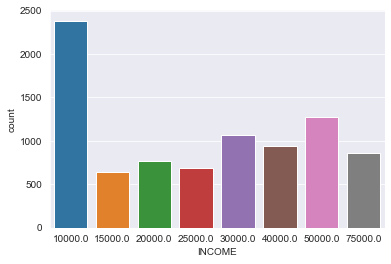

In [4271]:
income_stat = sns.countplot(data_income['INCOME'])

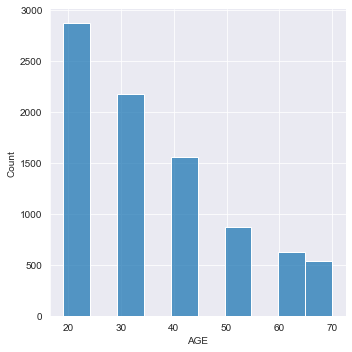

In [4272]:
sns.displot(data_income['AGE'], bins=10, kde=False)

/Users/Admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME', ylabel='AGE'>

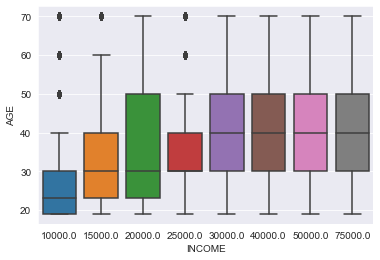

In [4273]:
sns.boxplot('INCOME', 'AGE', data=data_income)

In [4274]:
# median income age wise
data_income.groupby('INCOME')['AGE'].median()

INCOME
10000.0    23.0
15000.0    30.0
20000.0    30.0
25000.0    30.0
30000.0    40.0
40000.0    40.0
50000.0    40.0
75000.0    40.0
Name: AGE, dtype: float64

### Exploratory Data Analysis

__Job Type vs Income Status__

In [4275]:
data_income_visual.shape

(8630, 7)

In [4276]:
data_income_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8992
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8630 non-null   object
 1   SEX             8630 non-null   object
 2   MARITAL.STATUS  8630 non-null   object
 3   AGE             8630 non-null   object
 4   EDUCATION       8630 non-null   object
 5   OCCUPATION      8630 non-null   object
 6   DUAL.INCOMES    8630 non-null   object
dtypes: object(7)
memory usage: 539.4+ KB


In [4277]:
data_income_visual.describe()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,DUAL.INCOMES
count,8630,8630,8630,8630,8630,8630,8630
unique,9,2,5,7,6,9,3
top,-10.000),F,Single,25-34,1 to 3 years of college,Professional/Managerial,Not Married
freq,1645,4727,3565,2175,2997,2773,5229


In [4278]:
# data_income_visual['OCCUPATION'] = le.inverse_transform(data_income_visual['OCCUPATION'])
# data_income_visual['EDUCATION'] = le.inverse_transform(data_income_visual['EDUCATION'])

In [4279]:
data_income_visual['INCOME'] = data_income['INCOME']
data_income_visual['SEX'] = data_income['SEX']
data_income_visual['AGE'] = data_income['AGE']

In [4280]:
data_income_visual['SEX'].replace('F', 0, inplace=True)
data_income_visual['SEX'].replace('M', 1, inplace=True)
data_income_visual['SEX'].astype('int64')

0       0
1       1
2       0
3       0
4       0
       ..
8988    0
8989    1
8990    0
8991    1
8992    1
Name: SEX, Length: 8630, dtype: int64

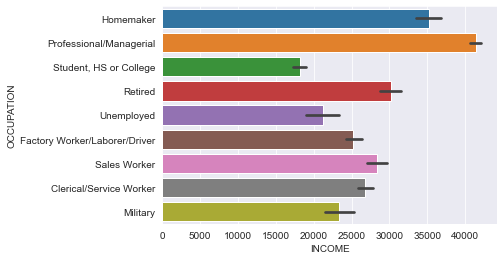

<Figure size 720x1440 with 0 Axes>

In [4281]:
sns.barplot(x='INCOME', y='OCCUPATION', data=data_income_visual)
# Create figure with specific size
fig = plt.figure(figsize=(10, 20))
plt.show()

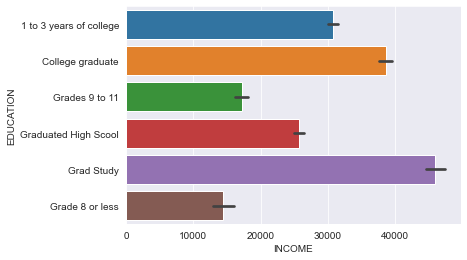

<Figure size 720x1440 with 0 Axes>

In [4282]:
sns.barplot(x='INCOME', y='EDUCATION', data=data_income_visual)
# Create figure with specific size
fig = plt.figure(figsize=(10, 20))
plt.show()

### Logistic Regression

In [4283]:
column_list = list(data_income_visual.columns)

In [4284]:
column_list

['INCOME',
 'SEX',
 'MARITAL.STATUS',
 'AGE',
 'EDUCATION',
 'OCCUPATION',
 'DUAL.INCOMES']

In [4285]:
# transform categorical data into int
data_income_visual['OCCUPATION'] = le.fit_transform(data_income_visual['OCCUPATION'])
data_income_visual['EDUCATION'] = le.fit_transform(data_income_visual['EDUCATION'])
data_income_visual['MARITAL.STATUS'] = le.fit_transform(data_income_visual['MARITAL.STATUS'])
data_income_visual['DUAL.INCOMES'] = le.fit_transform(data_income_visual['DUAL.INCOMES'])

In [4286]:
features = list(set(column_list) - set(['INCOME', 'DUAL.INCOMES', 'MARITAL.STATUS', 'OCCUPATION', 'AGE']))

In [4287]:
features

['EDUCATION', 'SEX']

In [4288]:
y = data_income['INCOME'].values

In [4289]:
y

array([75000., 75000., 75000., ..., 10000., 20000., 30000.])

In [4290]:
x = data_income_visual[features].values

In [4291]:
x

array([[0, 0],
       [1, 1],
       [1, 0],
       ...,
       [4, 0],
       [0, 1],
       [0, 1]])

In [4292]:
s.shape

(8630, 6)

In [4293]:
features

['EDUCATION', 'SEX']

In [4294]:
x_scaled = scaler.fit_transform(x)

In [4295]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [4296]:
# model = LogisticRegression()

In [4297]:
model = LinearRegression()

#### fitting the values for x and y

In [4298]:
model.fit(train_x, train_y)

LinearRegression()

In [4299]:
model.coef_

array([-2010.66871432,  1202.36934299])

In [4300]:
model.intercept_

34300.90607524979

#### Prediction from test data

In [4301]:
prediction = model.predict(test_x)

In [4302]:
prediction

array([32290.23736093, 34300.90607525, 32290.23736093, ...,
       24247.56250366, 34300.90607525, 31481.9379896 ])

#### Confusion matrix

In [4303]:
# confution_matrix_result = confusion_matrix(test_y, prediction)

In [4304]:
# confution_matrix_result

In [4305]:
y.shape

(8630,)

In [4306]:
prediction.shape

(2589,)

In [4307]:
# Ensure that the number of samples in y and prediction are equal
assert y.shape == prediction.shape, "Found input variables with inconsistent numbers of samples"

AssertionError: Found input variables with inconsistent numbers of samples

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y, prediction)

#### Calculate the accurecy

In [ ]:
accuracy_score_result = accuracy_score(test_y, prediction)

In [ ]:
accuracy_score_result

#### printing misclassified value from prediction

In [ ]:
print('misclassified values %d' % (test_y != prediction).sum() )